In [ ]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
bos = pd.DataFrame(boston.data)

bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
bos.shape

(506, 14)

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

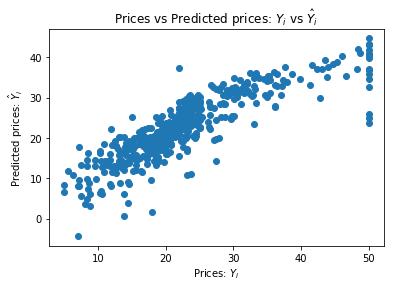

In [6]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
X = bos.iloc[:,0:-1]  #iloc gives the positional locations, so 'all rows' and 'all but the last column'
Y_true = bos.iloc[:,-1] 
lm.fit(X,Y_true)

Y_pred = lm.predict(X)

plt.scatter(Y_true, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [7]:
lm.score(X,Y_true)


0.7406077428649427

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(Y_pred,Y_true))
print(mean_absolute_error(Y_pred,Y_true))

21.8977792176875
3.272944637996939


In [9]:
import random
random.random()

0.5181712698321947

In [10]:
limit = .10
for i in range(X.shape[0]):
    miss_1 = random.random()
    miss_2 = random.random()
    if miss_1 < limit:
        X.iloc[i,4] = np.nan
    if miss_2 < limit:
        X.iloc[i,7] = np.nan
    

c:\programdata\miniconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,NaN,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,NaN,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,NaN,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [14]:
X.loc[X.iloc[:,4].isna(),'NOX'].shape

(56,)

In [15]:
sub = X['NOX'].mean()

In [13]:
np.nan == np.nan

False

In [16]:

X.loc[X.iloc[:,4].isna(),'NOX'] = sub

c:\programdata\miniconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:

sub = X['DIS'].mean()

X.loc[X.iloc[:,7].isna(),'DIS'] = sub

c:\programdata\miniconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [18]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.557122,6.575,65.2,4.090000,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469000,6.421,78.9,4.967100,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469000,7.185,61.1,4.967100,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458000,6.998,45.8,6.062200,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458000,7.147,54.2,6.062200,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458000,6.430,58.7,6.062200,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524000,6.012,66.6,5.560500,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524000,6.172,96.1,5.950500,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524000,5.631,100.0,3.789114,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.557122,6.004,85.9,6.592100,5.0,311.0,15.2,386.71,17.10


Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

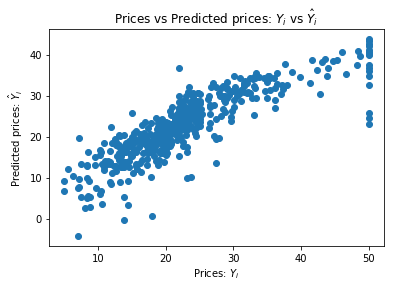

In [19]:
from sklearn.linear_model import LinearRegression

lm.fit(X,Y_true)

Y_pred = lm.predict(X)

plt.scatter(Y_true, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [20]:
lm.score(X,Y_true)

0.7292815746519397

In [21]:
print(mean_squared_error(Y_pred,Y_true))
print(mean_absolute_error(Y_pred,Y_true))

22.853929311179296
3.3565340899481324
